In [11]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
tickers = ['AAPL', 'MSFT', '^GSPC']


start_date = '2014-01-01'
end_date = '2020-01-07'

panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

panel_data.head()

close = panel_data['Close']

all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

close = close.reindex(all_weekdays)

close = close.fillna(method='ffill')

print(all_weekdays)

close.head()

close.describe()


DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-06',
               '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
               '2014-01-13', '2014-01-14',
               ...
               '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-30',
               '2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', length=1570, freq='B')


Symbols,AAPL,MSFT,^GSPC
count,1569.000000,1569.000000,1569.000000
mean,144.523065,74.880465,2368.238100
std,47.482923,32.905510,383.489361
min,71.397141,34.980000,1741.890015
25%,107.949997,47.009998,2051.600098
50%,129.619995,62.740002,2268.879883
75%,176.190002,101.160004,2723.070068
max,300.350006,160.619995,3257.850098


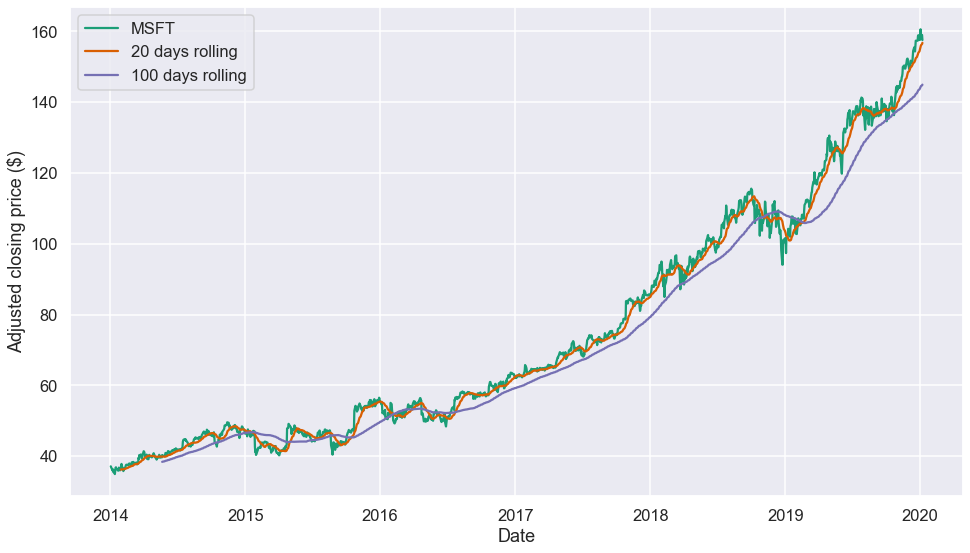

In [21]:
msft = close.loc[:, 'MSFT']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=20).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='MSFT')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='20 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()